<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Feature Selection </h2>	


<h4> In this section, we would like you to select between 15 and 20 features to focus your model on. This will require significant explatoratory research. The first one is already implemented for you, and the next two are pre-specified.  </h4>

In [ ]:
def ft0(image):
    return image.size
# Returns the pixel size of the image
def ft1(image):
    return image[:, :, 0].mean()
# Returns the average of the red-channel pictures for the images
def ft2(image):
    return image.shape[0] / image.shape[1]
#Returns the aspect ratio of the image


Define more features above, performing any EDA research below. We expect all external sources sited, and a couple significant different graphs indicating some form of EDA. 

In [217]:
# import everythings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
from skimage import feature
import os
import cv2

In [288]:
def short_side_resize(image, length=256):
    height, width, _ = image.shape
    if height < width:
        ratio = length / height
    else:
        ratio = length / width
    new_height = int(height * ratio)
    new_width = int(width * ratio)
    return skimage.transform.resize(image, (new_height, new_width), mode='reflect', anti_aliasing=True)

def center_crop(image, length=224):
    height, width, _ = image.shape
    cx, cy = height // 2, width // 2
    lx, ly = cx - length//2, cy - length//2
    hx, hy = length + lx, length + ly
    return image[lx:hx, ly:hy, :]

def ft_harris(image):
    image = center_crop(short_side_resize(image))
    #image = np.asarray(skimage.filters.gaussian(image, sigma=2))
    gray = skimage.color.rgb2gray(image)
    gray = np.array(gray * 255, dtype=np.uint8)
    harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    harris_corners = np.where(harris > 0)
    return len(harris_corners[0]) / harris.size

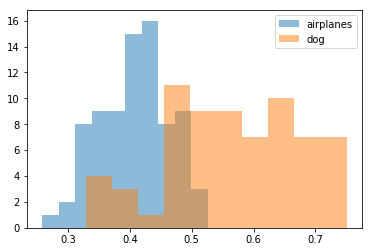

In [368]:
# EDA for Harris corner feature
path1 = '/home/sweetdum/ImageDetection/20_categories_training/airplanes/'
path2 = '/home/sweetdum/ImageDetection/20_categories_training/dog/'

def feature_counter(feature, path):
    num = []
    for fn in os.listdir(path):
        if not (fn.endswith('.jpg') or fn.endswith('.png')): 
            continue
        img = io.imread(os.path.join(path, fn))
        if len(img.shape) == 2: # gray
            img = skimage.color.gray2rgb(img)
        num.append(feature(img))
    return num

harris_corners_counter = lambda x: feature_counter(ft_harris, x)
airplanes = harris_corners_counter(path1)
dog = harris_corners_counter(path2)

plt.hist(airplanes, alpha=0.5, label='airplanes')
plt.hist(dog, alpha=0.5, label='dog')
plt.legend(loc='upper right')

0.7205882352941176
0.84251968503937


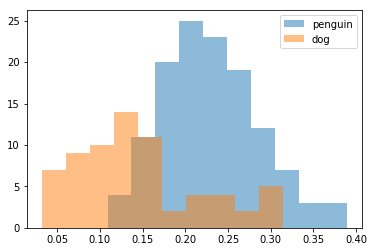

In [421]:
#DoG: Difference of Gaussian

path1 =  '20_categories_training/leopards/'
path2 = '20_categories_training/dog/'
def ft_dog(img):
    gray = skimage.color.rgb2gray(img)
    g3 = np.asarray(skimage.filters.gaussian(gray, sigma=0.3))
    g5 = np.asarray(skimage.filters.gaussian(gray, sigma=0.5))
    dog = g3-g5
    return sum(sum(dog > 0.05 *dog.max() ))/dog.size

dog_counter = lambda x: feature_counter(ft_dog, x)
porcupine = dog_counter(path1)
dog = dog_counter(path2)
plt.hist(porcupine, alpha=0.5, label='leopards')
plt.hist(dog, alpha=0.5, label='dog')
plt.legend(loc='upper right')
print(sum(np.array(dog) < 0.17) / len(dog))
print(sum(np.array(porcupine) >= 0.17) / len(porcupine))

<h4> Graphs </h4>

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [ ]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [ ]:
feature_frame(data_from_nb1)